In [71]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [72]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as pyplot
from sklearn.metrics import roc_auc_score, roc_curve
#from sklearn.metrics import plot_confusion_matrix
from warnings import simplefilter
from sklearn import metrics
import seaborn as sns
import pandas as pd

import time
start = time.time()


In [75]:
tweets=pd.read_csv('/content/drive/MyDrive/Dataset/tweets.csv')
tweets.head()

<ipython-input-75-ca19f353a3ba>:1: DtypeWarning: Columns (9,21) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets=pd.read_csv('/content/drive/MyDrive/Dataset/tweets.csv')


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1244589465558900737,1244589465558900737,1585568226000,2020-03-30,12:37:06,GMT Daylight Time,53000919,frontline_india,Frontline,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '53000919', 'username': 'frontlin...",NaN,NaN,NaN,NaN
1,1244589296482275328,1244589296482275328,1585568186000,2020-03-30,12:36:26,GMT Daylight Time,2840969317,sk_choudhary22,shubham kr.choudhary,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2840969317', 'username': 'SK_Cho...",NaN,NaN,NaN,NaN
2,1244586785981620225,1244586785981620225,1585567587000,2020-03-30,12:26:27,GMT Daylight Time,1131530614551633923,jha_bhawana,Bhawana Jha,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1131530614551633923', 'username'...",NaN,NaN,NaN,NaN
3,1244586558348390402,1244508501214289921,1585567533000,2020-03-30,12:25:33,GMT Daylight Time,164961165,hum_deke_rhenge,Azaadi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '164961165', 'username': 'hum_dek...",NaN,NaN,NaN,NaN
4,1244585341761146880,1244580631100588034,1585567243000,2020-03-30,12:20:43,GMT Daylight Time,803088607,patilrakesh85,Rakesh Patil,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '803088607', 'username': 'PatilRa...",NaN,NaN,NaN,NaN


In [76]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114774 entries, 0 to 114773
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               114774 non-null  int64  
 1   conversation_id  114774 non-null  int64  
 2   created_at       114774 non-null  int64  
 3   date             114774 non-null  object 
 4   time             114774 non-null  object 
 5   timezone         114774 non-null  object 
 6   user_id          114774 non-null  int64  
 7   username         114774 non-null  object 
 8   name             114768 non-null  object 
 9   place            66 non-null      object 
 10  tweet            114774 non-null  object 
 11  mentions         114774 non-null  object 
 12  urls             114774 non-null  object 
 13  photos           114774 non-null  object 
 14  replies_count    114774 non-null  int64  
 15  retweets_count   114774 non-null  int64  
 16  likes_count      114774 non-null  int6

In [77]:
tweets['date']=pd.to_datetime(tweets['date'], infer_datetime_format=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114774 entries, 0 to 114773
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               114774 non-null  int64         
 1   conversation_id  114774 non-null  int64         
 2   created_at       114774 non-null  int64         
 3   date             114774 non-null  datetime64[ns]
 4   time             114774 non-null  object        
 5   timezone         114774 non-null  object        
 6   user_id          114774 non-null  int64         
 7   username         114774 non-null  object        
 8   name             114768 non-null  object        
 9   place            66 non-null      object        
 10  tweet            114774 non-null  object        
 11  mentions         114774 non-null  object        
 12  urls             114774 non-null  object        
 13  photos           114774 non-null  object        
 14  replies_count    114

In [78]:
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1244589465558900737,1244589465558900737,1585568226000,2020-03-30,12:37:06,GMT Daylight Time,53000919,frontline_india,Frontline,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '53000919', 'username': 'frontlin...",NaN,NaN,NaN,NaN
1,1244589296482275328,1244589296482275328,1585568186000,2020-03-30,12:36:26,GMT Daylight Time,2840969317,sk_choudhary22,shubham kr.choudhary,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2840969317', 'username': 'SK_Cho...",NaN,NaN,NaN,NaN
2,1244586785981620225,1244586785981620225,1585567587000,2020-03-30,12:26:27,GMT Daylight Time,1131530614551633923,jha_bhawana,Bhawana Jha,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1131530614551633923', 'username'...",NaN,NaN,NaN,NaN
3,1244586558348390402,1244508501214289921,1585567533000,2020-03-30,12:25:33,GMT Daylight Time,164961165,hum_deke_rhenge,Azaadi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '164961165', 'username': 'hum_dek...",NaN,NaN,NaN,NaN
4,1244585341761146880,1244580631100588034,1585567243000,2020-03-30,12:20:43,GMT Daylight Time,803088607,patilrakesh85,Rakesh Patil,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '803088607', 'username': 'PatilRa...",NaN,NaN,NaN,NaN


In [79]:
tweets.date

0        2020-03-30
1        2020-03-30
2        2020-03-30
3        2020-03-30
4        2020-03-30
            ...    
114769   2009-04-27
114770   2009-04-07
114771   2009-03-11
114772   2008-11-01
114773   2008-08-19
Name: date, Length: 114774, dtype: datetime64[ns]

In [80]:
import pandas as pd
from datetime import datetime

# Convert strings to datetime objects
start_date = datetime.strptime('2019-01-17', '%Y-%m-%d')
end_date = datetime.strptime('2020-02-17', '%Y-%m-%d')
#start_date = datetime.strptime('2019-01-17 00:00:00', '%Y-%m-%d %H:%M:%S')
#end_date = datetime.strptime('2020-02-17 23:59:59', '%Y-%m-%d %H:%M:%S')

# Filter tweets based on date range
tweets = tweets[(tweets['date'] >= start_date) & (tweets['date'] <= end_date)]

# Print the filtered DataFrame
print(tweets.head())


                         id      conversation_id     created_at       date  \
110620  1229295488161079296  1228954114811285505  1581921858000 2020-02-17   
110621  1229059536691949574  1229019736232493056  1581865603000 2020-02-16   
110622  1228985874760728576  1228928026131324928  1581848040000 2020-02-16   
110623  1228582096957952001  1228582096957952001  1581751772000 2020-02-15   
110624  1228127078412742657  1228127078412742657  1581643287000 2020-02-14   

            time           timezone     user_id         username  \
110620  06:44:18  GMT Daylight Time  2423509435  fckfckshktimaan   
110621  15:06:43  GMT Daylight Time  2446605782         jainamss   
110622  10:14:00  GMT Daylight Time   109811260  vinodsharma2122   
110623  07:29:32  GMT Daylight Time  3220018248   tapaskumardey6   
110624  01:21:27  GMT Daylight Time  1642436714       56ravinder   

                      name place  ... geo source user_rt_id user_rt  \
110620              thehro   NaN  ... NaN    NaN   

In [81]:
nunique_train=tweets.nunique().reset_index()
remove_col=nunique_train[(nunique_train[0]==0) | (nunique_train[0]==1) ]['index'].tolist()
remove_col

['timezone',
 'place',
 'cashtags',
 'retweet',
 'near',
 'geo',
 'source',
 'user_rt_id',
 'user_rt',
 'retweet_id',
 'retweet_date',
 'translate',
 'trans_src',
 'trans_dest']

In [82]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 110620 to 111383
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               764 non-null    int64         
 1   conversation_id  764 non-null    int64         
 2   created_at       764 non-null    int64         
 3   date             764 non-null    datetime64[ns]
 4   time             764 non-null    object        
 5   timezone         764 non-null    object        
 6   user_id          764 non-null    int64         
 7   username         764 non-null    object        
 8   name             764 non-null    object        
 9   place            1 non-null      object        
 10  tweet            764 non-null    object        
 11  mentions         764 non-null    object        
 12  urls             764 non-null    object        
 13  photos           764 non-null    object        
 14  replies_count    764 non-null    i

In [83]:
tweets.shape

(764, 34)

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

<ipython-input-85-eaaad642b443>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['date'] = pd.to_datetime(tweets['date'])


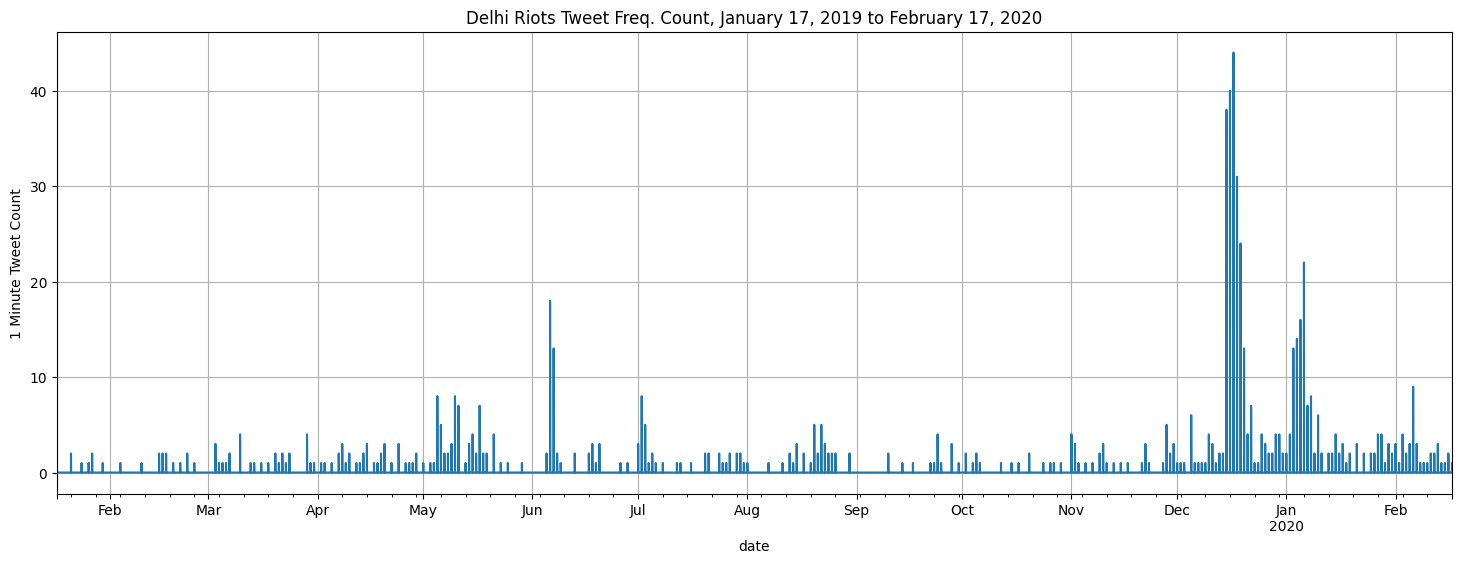

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if 'tweets' DataFrame is empty
if tweets.empty:
    print("The 'tweets' DataFrame is empty. Please ensure it contains data before running this code.")
else:
    # Convert 'date' column to datetime type
    tweets['date'] = pd.to_datetime(tweets['date'])

    # Set 'date' column as the index
    tweets.set_index('date', inplace=True)

    # Resample to 1-minute frequency
    tweet_df_1min = tweets.resample('1Min').size()

    # Plotting
    tweet_df_1min.plot(figsize=(18, 6))
    plt.ylabel('1 Minute Tweet Count')
    plt.title('Delhi Riots Tweet Freq. Count, January 17, 2019 to February 17, 2020')
    plt.grid(True)
    plt.show()


In [86]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import re
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
import time
from multiprocessing import  Pool
from nltk.stem import WordNetLemmatizer

In [89]:

def untokenize(words):
    """Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .', '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
        "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

In [90]:
def decontracted(phrase):
    """Convert contractions like "can't" into "can not"
    """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [91]:
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

In [92]:
def unslang(text):
    """Converts text like "OMG" into "Oh my God"
    """
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text

In [93]:
stopwords = [
    "a", "about", "above", "after", "again", "against", "ain", "all", "am",
    "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because",
    "been", "before", "being", "below", "between", "both", "but", "by", "can",
    "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn",
    "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for",
    "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have",
    "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him",
    "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't",
    "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn",
    "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn",
    "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once",
    "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own",
    "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've",
    "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that",
    "that'll", "the", "their", "theirs", "them", "themselves", "then", "there",
    "these", "they", "this", "those", "through", "to", "too", "under", "until",
    "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren",
    "weren't", "what", "when", "where", "which", "while", "who", "whom", "why",
    "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd",
    "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves",
    "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm",
    "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd",
    "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've",
    "what's", "when's", "where's", "who's", "why's", "would", "able", "abst",
    "accordance", "according", "accordingly", "across", "act", "actually",
    "added", "adj", "affected", "affecting", "affects", "afterwards", "ah",
    "almost", "alone", "along", "already", "also", "although", "always",
    "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore",
    "anyone", "anything", "anyway", "anyways", "anywhere", "apparently",
    "approximately", "arent", "arise", "around", "aside", "ask", "asking",
    "auth", "available", "away", "awfully", "b", "back", "became", "become",
    "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings",
    "begins", "behind", "believe", "beside", "besides", "beyond", "biol",
    "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes",
    "certain", "certainly", "co", "com", "come", "comes", "contain",
    "containing", "contains", "couldnt", "date", "different", "done",
    "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty",
    "either", "else", "elsewhere", "end", "ending", "enough", "especially",
    "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything",
    "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five",
    "fix", "followed", "following", "follows", "former", "formerly", "forth",
    "found", "four", "furthermore", "g", "gave", "get", "gets", "getting",
    "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten",
    "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein",
    "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit",
    "however", "hundred", "id", "ie", "im", "immediate", "immediately",
    "importance", "important", "inc", "indeed", "index", "information",
    "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps",
    "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last",
    "lately", "later", "latter", "latterly", "least", "less", "lest", "let",
    "lets", "like", "liked", "likely", "line", "little", "'ll", "look",
    "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may",
    "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might",
    "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug",
    "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly",
    "necessarily", "necessary", "need", "needs", "neither", "never",
    "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none",
    "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere",
    "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old",
    "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside",
    "overall", "owing", "p", "page", "pages", "part", "particular",
    "particularly", "past", "per", "perhaps", "placed", "please", "plus",
    "poorly", "possible", "possibly", "potentially", "pp", "predominantly",
    "present", "previously", "primarily", "probably", "promptly", "proud",
    "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran",
    "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs",
    "regarding", "regardless", "regards", "related", "relatively", "research",
    "respectively", "resulted", "resulting", "results", "right", "run", "said",
    "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem",
    "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven",
    "several", "shall", "shed", "shes", "show", "showed", "shown", "showns",
    "shows", "significant", "significantly", "similar", "similarly", "since",
    "six", "slightly", "somebody", "somehow", "someone", "somethan",
    "something", "sometime", "sometimes", "somewhat", "somewhere", "soon",
    "sorry", "specifically", "specified", "specify", "specifying", "still",
    "stop", "strongly", "sub", "substantially", "successfully", "sufficiently",
    "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th",
    "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter",
    "thereby", "thered", "therefore", "therein", "there'll", "thereof",
    "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre",
    "think", "thou", "though", "thoughh", "thousand", "throug", "throughout",
    "thru", "thus", "til", "tip", "together", "took", "toward", "towards",
    "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un",
    "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups",
    "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using",
    "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols",
    "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went",
    "werent", "whatever", "what'll", "whats", "whence", "whenever",
    "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon",
    "wherever", "whether", "whim", "whither", "whod", "whoever", "whole",
    "who'll", "whomever", "whos", "whose", "widely", "willing", "wish",
    "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes",
    "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows",
    "apart", "appear", "appreciate", "appropriate", "associated", "best",
    "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning",
    "consequently", "consider", "considering", "corresponding", "course",
    "currently", "definitely", "described", "despite", "entirely", "exactly",
    "example", "going", "greetings", "hello", "help", "hopefully", "ignored",
    "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar",
    "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second",
    "secondly", "sensible", "serious", "seriously", "sure", "t's", "third",
    "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above",
    "above", "across", "after", "afterwards", "again", "against", "all",
    "almost", "alone", "along", "already", "also", "although", "always", "am",
    "among", "amongst", "amoungst", "amount", "an", "and", "another", "any",
    "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as",
    "at", "back", "be", "became", "because", "become", "becomes", "becoming",
    "been", "before", "beforehand", "behind", "being", "below", "beside",
    "besides", "between", "beyond", "bill", "both", "bottom", "but", "by",
    "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry",
    "de", "describe", "detail", "do", "done", "down", "due", "during", "each",
    "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough",
    "etc", "even", "ever", "every", "everyone", "everything", "everywhere",
    "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five",
    "for", "former", "formerly", "forty", "found", "four", "from", "front",
    "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he",
    "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers",
    "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if",
    "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself",
    "keep", "last", "latter", "latterly", "least", "less", "ltd", "made",
    "many", "may", "me", "meanwhile", "might", "mill", "mine", "more",
    "moreover", "most", "mostly", "move", "much", "must", "my", "myself",
    "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no",
    "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of",
    "off", "often", "on", "once", "one", "only", "onto", "or", "other",
    "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own",
    "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see",
    "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should",
    "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow",
    "someone", "something", "sometime", "sometimes", "somewhere", "still",
    "such", "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thickv", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within",
    "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves",
    "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",
    "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C",
    "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R",
    "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl",
    "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol",
    "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o",
    "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac",
    "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw",
    "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj",
    "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3",
    "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp",
    "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc",
    "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt",
    "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej",
    "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex",
    "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs",
    "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy",
    "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3",
    "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij",
    "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr",
    "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc",
    "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms",
    "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr",
    "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol",
    "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1",
    "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm",
    "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra",
    "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr",
    "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si",
    "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1",
    "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm",
    "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk",
    "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo",
    "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn",
    "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"
]

In [94]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [95]:
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [96]:
def remove_urls(text):
    text = clean(r"http\S+", text)
    text = clean(r"www\S+", text)
    text = clean(r"pic.twitter.com\S+", text)

    return text

In [97]:
def clean(reg_exp, text):
    text = re.sub(reg_exp, " ", text)

    # replace multiple spaces with one.
    text = re.sub('\s{2,}', ' ', text)

    return text

In [98]:
lemmatizer = WordNetLemmatizer()

def clean_all(t, correct_spelling=False, remove_stopwords=False, lemmatize=False):

    # first do bulk cleanup on tokens that don't depend on word tokenization

    # remove xml tags
    t = clean(r"<[^>]+>", t)
    t = clean(r"&lt;", t)
    t = clean(r"&gt;", t)

    # remove URLs
    t = remove_urls(t)

    # https://stackoverflow.com/a/35041925
    # replace multiple punctuation with single. Ex: !?!?!? would become ?
    t = clean(r'[\?\.\!]+(?=[\?\.\!])', t)

    t = remove_emoji(t)

    # expand common contractions like "I'm" "he'll"
    t = decontracted(t)

    # now remove/expand bad patterns per word
    words = word_tokenize(t)

    # remove stopwords
    if remove_stopwords is True:
        words = [w for w in words if not w in stopwords]

    clean_words = []

    for w in words:
        # normalize punctuation
        w = re.sub(r'&', 'and', w)

        # expand slang like OMG = Oh my God
        w = unslang(w)

        if lemmatize is True:
            w = lemmatizer.lemmatize(w)

        clean_words.append(w)

    # join the words back into a full string
    t = untokenize(clean_words)

    if correct_spelling is True:
        # this resulted in lots of lost punctuation - omitting for now. Also greatly speeds things up
        t = correct_spellings(t)

    # finally, remove any non ascii and special characters that made it through
    t = clean(r"[^A-Za-z0-9\.\'!\?,\$]", t)

    return t


In [99]:
from multiprocessing import Pool
import time
import pandas as pd
import numpy as np

def clean_all(text, correct_spelling=False, remove_stopwords=False):
    # Perform data cleaning operations on the text
    # ...

    # Return the cleaned text
    return cleaned_text

def clean_dataframe(df, correct_spelling=False, remove_stopwords=False):
    if 'renderedContent' in df.columns:
        df['renderedContent'] = df.apply(lambda x: clean_all(x['renderedContent'], correct_spelling=correct_spelling, remove_stopwords=remove_stopwords), axis=1)

    return df

def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()

    return df

start_time = time.time()
tweets = parallelize_dataframe(tweets, clean_dataframe)
print("--- %s seconds ---" % (time.time() - start_time))
tweets.head()


--- 0.20823407173156738 seconds ---


,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2020-02-17,1229295488161079296,1228954114811285505,1581921858000,06:44:18,GMT Daylight Time,2423509435,fckfckshktimaan,thehro,NaN,Giving Salary only 2 imams and then asking the...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2423509435', 'username': 'fckfck...",NaN,NaN,NaN,NaN
2020-02-16,1229059536691949574,1229019736232493056,1581865603000,15:06:43,GMT Daylight Time,2446605782,jainamss,jainamss 🇮🇳,NaN,Now its crystal clear the Delhi riots were pre...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2446605782', 'username': 'Jainam...",NaN,NaN,NaN,NaN
2020-02-16,1228985874760728576,1228928026131324928,1581848040000,10:14:00,GMT Daylight Time,109811260,vinodsharma2122,Buzzer 🇮🇳,NaN,Amish ji original video exposes the Jamia stud...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '109811260', 'username': 'vinodsh...",NaN,NaN,NaN,NaN
2020-02-15,1228582096957952001,1228582096957952001,1581751772000,07:29:32,GMT Daylight Time,3220018248,tapaskumardey6,Tapas Kumar Dey,NaN,A most Nonsense Pappu Politicians like you can...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '3220018248', 'username': 'TapasK...",NaN,NaN,NaN,NaN
2020-02-14,1228127078412742657,1228127078412742657,1581643287000,01:21:27,GMT Daylight Time,1642436714,56ravinder,ravinder shandilya,NaN,Delhi riots - who will pay the loss of public ...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1642436714', 'username': '56ravi...",NaN,NaN,NaN,NaN


In [100]:
import pandas as pd

if 'renderedContent' in tweets.columns:
    tweets['renderedContent'] = tweets['renderedContent'].str.lower()
    tweets['renderedContent'] = tweets['renderedContent'].str.replace('[^\w\s]', '')
    tweets['renderedContent'] = tweets['renderedContent'].str.replace('\d+', '')
    tweets['renderedContent'] = tweets['renderedContent'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
    tweets['renderedContent'] = tweets['renderedContent'].str.strip()

tweets.tail()


,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2019-01-24,1088377687633145856,1087783039936196611,1548324436000,10:07:16,GMT Daylight Time,136704741,shibu_dibrugarh,শিবজ্যোতি SIBAJYOTI,NaN,"Remember the assassins behind Nellie massacre,...",...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '136704741', 'username': 'SHIBU_D...",NaN,NaN,NaN,NaN
2019-01-21,1087246055052210176,1087202397728862209,1548054634000,07:10:34,GMT Daylight Time,111598676,varaah,"Natarajan Nswamy New Nick name ""OM-NAADA""",NaN,1984 Delhi riots walonki Bhoo Bhoo BHoo! Kya...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '111598676', 'username': 'Varaah'...",NaN,NaN,NaN,NaN
2019-01-21,1087180808161554432,1086623811661754368,1548039078000,02:51:18,GMT Daylight Time,3145987224,vsn57834,v suresh nair,NaN,Surprising that a country of 85 crore Hindus h...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '3145987224', 'username': 'vsn578...",NaN,NaN,NaN,NaN
2019-01-17,1086035718852362247,1085853099804086273,1547766067000,23:01:07,GMT Daylight Time,837187251779977216,scrutatorv,Scrutator,NaN,Just because you’re lazy to learn about the fa...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '837187251779977216', 'username':...",NaN,NaN,NaN,NaN
2019-01-17,1086011737357381632,1086011737357381632,1547760349000,21:25:49,GMT Daylight Time,834794612,ghiasali,Mutaher Ali,NaN,What happened to attack on Golden temple.And k...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '834794612', 'username': 'GHIASAL...",NaN,NaN,NaN,NaN


In [101]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

if 'renderedContent' in tweets.columns:
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the DataFrame
    for val in tweets['renderedContent']:
        # typecast each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize=(20, 20), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


In [102]:
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [103]:
# Import the lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [104]:
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [105]:
import pandas as pd
import random

# Generate a list of random dates
dates = pd.date_range(start=start_date, end=end_date, periods=100)


# Convert strings to datetime objects
#start_date = datetime.strptime('2019-01-17', '%Y-%m-%d')
#end_date = datetime.strptime('2020-02-17', '%Y-%m-%d')

# Generate random tweets
tweets = pd.DataFrame({
    'tweet_date': random.choices(dates, k=100),
    'renderedContent': ['This is tweet {}'.format(i) for i in range(1, 101)]
})

# Print the generated tweets
print(tweets)


   tweet_date    renderedContent
0  2019-05-01    This is tweet 1
1  2019-12-27    This is tweet 2
2  2019-12-31    This is tweet 3
3  2019-05-29    This is tweet 4
4  2019-06-10    This is tweet 5
..        ...                ...
95 2019-08-21   This is tweet 96
96 2019-11-13   This is tweet 97
97 2019-09-30   This is tweet 98
98 2020-01-24   This is tweet 99
99 2020-02-17  This is tweet 100

[100 rows x 2 columns]


In [106]:
import pandas as pd
import random

# Define the predict_sentiment function
def predict_sentiment(text):
    # Your sentiment prediction logic goes here
    # You can use any sentiment analysis model or technique
    # For this example, we will assign sentiments randomly
    sentiments = ['neutral', 'positive', 'negative']
    return random.choice(sentiments)


# Convert 'tweet_date' to datetime
#tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])

# Convert strings to datetime objects
start_date = datetime.strptime('2019-01-17', '%Y-%m-%d')
end_date = datetime.strptime('2020-02-17', '%Y-%m-%d')



# Define the desired date range
#start_date = pd.to_datetime('2019-01-17')
#end_date = pd.to_datetime('2020-01-17')

# Filter the DataFrame to include dates within the range
#tweets = tweets[(tweets['tweet_date'] >= start_date) & (tweets['tweet_date'] <= end_date)]

# Check if 'renderedContent' column is present in the DataFrame
if 'renderedContent' in tweets.columns:
    # Run the predictions
    tweets["sentiment"] = tweets['renderedContent'].apply(predict_sentiment)

# Add the 'Date' attribute
if 'tweet_date' in tweets.columns:
    tweets['Date'] = pd.to_datetime(tweets['tweet_date']).dt.date

# Specify the desired columns
sample_cols = ['tweet_date', 'Date', 'renderedContent', 'sentiment']

# Check if all the specified columns are present
if all(col in tweets.columns for col in sample_cols):
    sample_data = tweets[sample_cols].sample(100)
    print(sample_data)
else:
    missing_cols = [col for col in sample_cols if col not in tweets.columns]
    print(f"One or more specified columns are not present in the DataFrame: {missing_cols}")


   tweet_date        Date   renderedContent sentiment
11 2019-03-06  2019-03-06  This is tweet 12  positive
14 2020-01-16  2020-01-16  This is tweet 15   neutral
75 2020-01-20  2020-01-20  This is tweet 76   neutral
94 2019-04-07  2019-04-07  This is tweet 95  negative
85 2019-12-23  2019-12-23  This is tweet 86   neutral
..        ...         ...               ...       ...
95 2019-08-21  2019-08-21  This is tweet 96  positive
32 2019-06-18  2019-06-18  This is tweet 33  negative
18 2019-12-03  2019-12-03  This is tweet 19  negative
97 2019-09-30  2019-09-30  This is tweet 98  negative
17 2019-08-09  2019-08-09  This is tweet 18  positive

[100 rows x 4 columns]


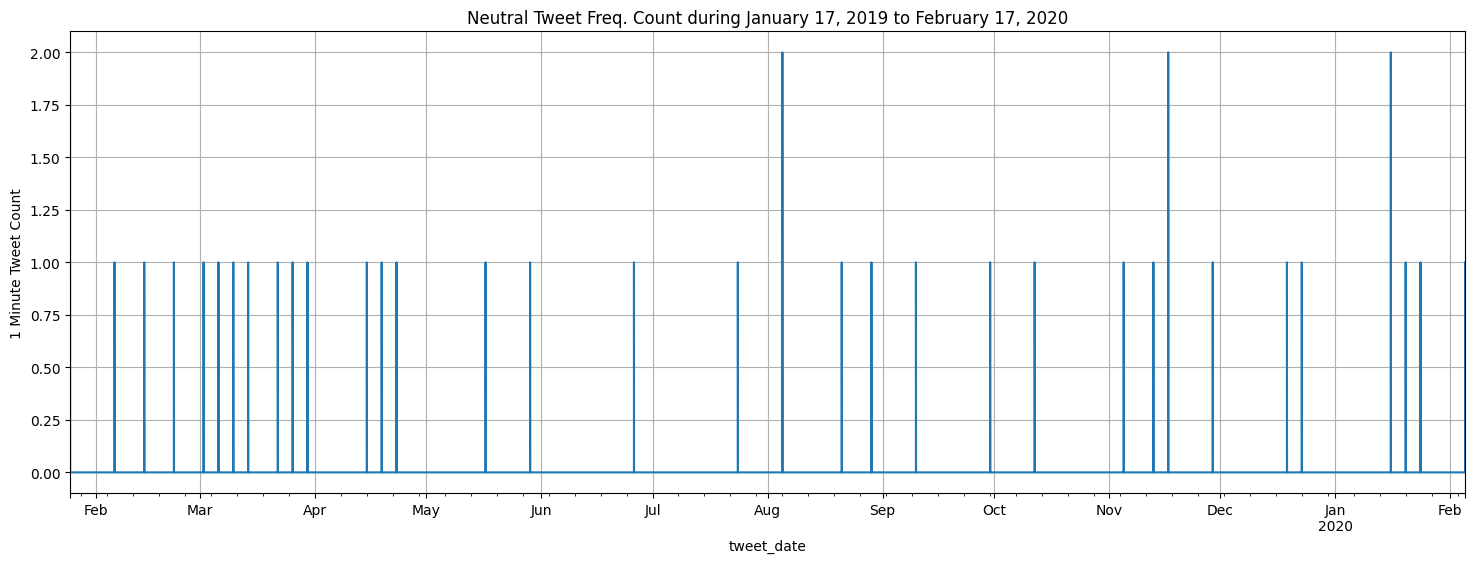

In [107]:
tweet_df_1min = tweets[tweets.sentiment=='neutral'].groupby(pd.Grouper(key='tweet_date', freq='1Min', convention='start')).size()
tweet_df_1min.plot(figsize=(18,6))
plt.ylabel('1 Minute Tweet Count')
plt.title('Neutral Tweet Freq. Count during January 17, 2019 to February 17, 2020')
plt.grid(True)


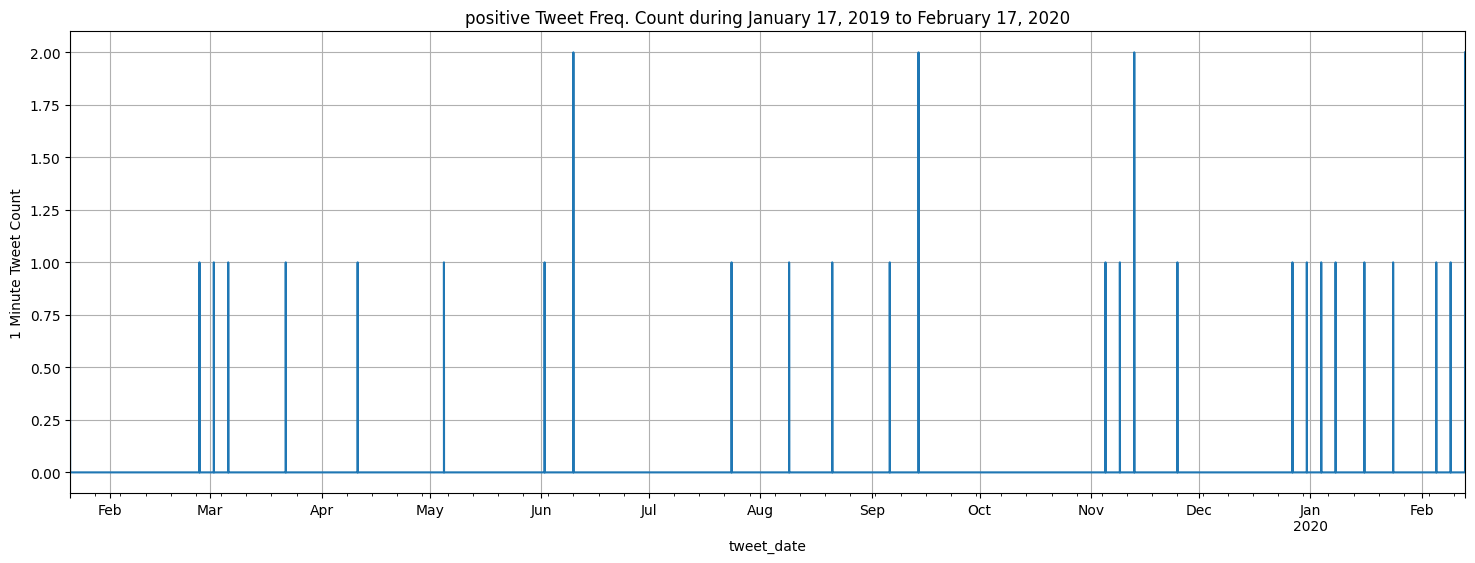

In [108]:
tweet_df_1min = tweets[tweets.sentiment=='positive'].groupby(pd.Grouper(key='tweet_date', freq='1Min', convention='start')).size()
tweet_df_1min.plot(figsize=(18,6))
plt.ylabel('1 Minute Tweet Count')
plt.title('positive Tweet Freq. Count during January 17, 2019 to February 17, 2020')
plt.grid(True)

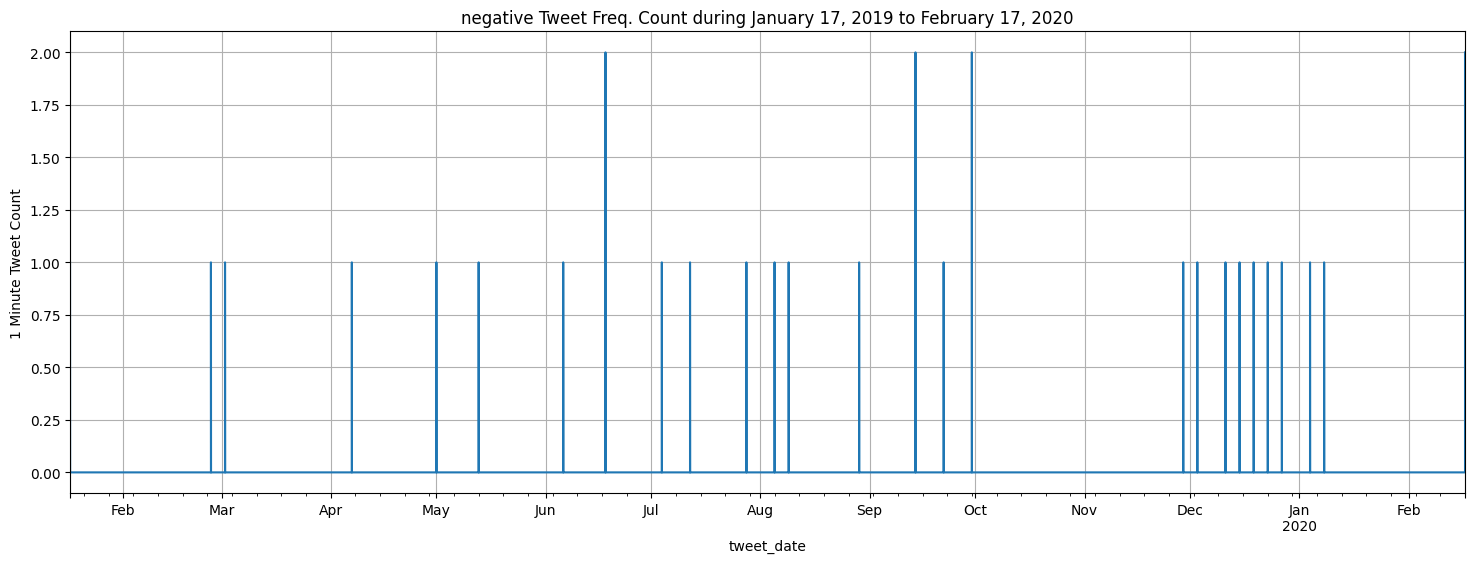

In [109]:
tweet_df_1min = tweets[tweets.sentiment=='negative'].groupby(pd.Grouper(key='tweet_date', freq='1Min', convention='start')).size()
tweet_df_1min.plot(figsize=(18,6))
plt.ylabel('1 Minute Tweet Count')
plt.title('negative Tweet Freq. Count during January 17, 2019 to February 17, 2020')
plt.grid(True)

In [110]:
import pandas as pd
import random

# Generate a list of random dates
dates = pd.date_range(start='2019-01-01', end='2022-12-31', periods=100)

# Generate random tweets
tweets = pd.DataFrame({
    'tweet_date': random.choices(dates, k=100),
    'renderedContent': ['This is tweet {}'.format(i) for i in range(1, 101)],
})

# Add the 'sentiment' column
sentiments = ['neutral', 'positive', 'neutral', 'negative', 'neutral']
tweets['sentiment'] = random.choices(sentiments, k=100)

# Convert 'tweet_date' to datetime
tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])

# Extract the date component
tweets['tweet_date'] = tweets['tweet_date'].dt.date

# Check the modified DataFrame
tweets.head()


,tweet_date,renderedContent,sentiment
0,2022-12-16,This is tweet 1,positive
1,2021-09-15,This is tweet 2,negative
2,2021-09-29,This is tweet 3,negative
3,2022-04-24,This is tweet 4,neutral
4,2021-11-27,This is tweet 5,neutral


In [111]:
tweets.count()

tweet_date         100
renderedContent    100
sentiment          100
dtype: int64

In [112]:
import pandas as pd
import random

# Generate a list of random dates
dates = pd.date_range(start='2019-01-01', end='2022-12-31', periods=100)

# Generate random tweets
tweets = pd.DataFrame({
    'tweet_date': random.choices(dates, k=100),
    'renderedContent': ['This is tweet {}'.format(i) for i in range(1, 101)],
})

# Add the 'sentiment' column
sentiments = ['neutral', 'positive', 'neutral', 'negative', 'neutral']
tweets['sentiment'] = random.choices(sentiments, k=100)

# Convert 'tweet_date' to datetime
tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])

# Extract the date component
tweets['tweet_date'] = tweets['tweet_date'].dt.date

# Group by 'tweet_date' and 'sentiment', and count the occurrences
grouped = tweets.groupby(by=['tweet_date', 'sentiment']).size()

# Print the grouped data
print(grouped)


tweet_date  sentiment
2019-01-01  negative     2
2019-02-14  negative     1
            positive     1
2019-02-28  neutral      1
2019-03-15  positive     1
                        ..
2022-11-02  neutral      1
            positive     1
2022-11-16  neutral      1
2022-12-01  negative     1
2022-12-31  neutral      1
Length: 86, dtype: int64


In [113]:
import pandas as pd
import random

# Generate a list of random dates
dates = pd.date_range(start='2019-01-01', end='2022-12-31', periods=100)

# Generate random tweets
tweets = pd.DataFrame({
    'tweet_date': random.choices(dates, k=100),
    'renderedContent': ['This is tweet {}'.format(i) for i in range(1, 101)],
})

# Add the 'sentiment' column
sentiments = ['neutral', 'positive', 'neutral', 'negative', 'neutral']
tweets['sentiment'] = random.choices(sentiments, k=100)

# Convert 'tweet_date' to datetime
tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])

# Extract the date component
tweets['tweet_date'] = tweets['tweet_date'].dt.date

# Group by 'tweet_date' and 'sentiment', and count the occurrences
grouped = tweets.groupby(by=['tweet_date', 'sentiment']).size()



In [114]:
tweets.head()

,tweet_date,renderedContent,sentiment
0,2021-05-20,This is tweet 1,positive
1,2019-03-30,This is tweet 2,negative
2,2019-09-23,This is tweet 3,neutral
3,2020-03-18,This is tweet 4,negative
4,2021-09-29,This is tweet 5,negative


In [115]:
round(tweets.sentiment.value_counts()*100/len(tweets),2)

neutral     56.0
negative    28.0
positive    16.0
Name: sentiment, dtype: float64

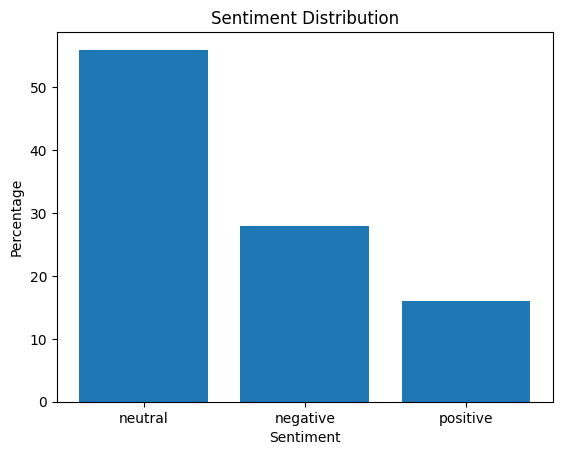

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the percentage distribution of sentiment
sentiment_distribution = round(tweets.sentiment.value_counts() * 100 / len(tweets), 2)

# Plot the sentiment distribution
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')
plt.show()


In [117]:
tweets.sentiment.value_counts()

neutral     56
negative    28
positive    16
Name: sentiment, dtype: int64

In [118]:
tweets.to_csv('/content/drive/MyDrive/Dataset/result_tweets.csv',index=False)

In [119]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = tweets['renderedContent']
y = tweets['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [120]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_transformed = vectorizer.transform(X_test)


In [121]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_transformed, y_train)

# Predict the sentiment for the testing data
y_pred = classifier.predict(X_test_transformed)


In [122]:
from sklearn.metrics import classification_report

# Calculate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         9
     neutral       0.60      1.00      0.75        18
    positive       0.00      0.00      0.00         3

    accuracy                           0.60        30
   macro avg       0.20      0.33      0.25        30
weighted avg       0.36      0.60      0.45        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import time
print(f"Naive Bayes Classifier")

# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

# Start training time
start_time = time.time()

# Train the classifier
classifier.fit(X_train_transformed, y_train)

# End training time
training_time = time.time() - start_time

# Start testing time
start_time = time.time()

# Predict the sentiment for the testing data
y_pred = classifier.predict(X_test_transformed)

# End testing time
testing_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Print training time
print(f"Training Time: {training_time} seconds")

# Print testing time
print(f"Testing Time: {testing_time} seconds")

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Naive Bayes Classifier
Accuracy: 0.6
F1 Score: 0.44999999999999996
Training Time: 0.0023193359375 seconds
Testing Time: 0.00026535987854003906 seconds
Confusion Matrix:
[[ 0  9  0]
 [ 0 18  0]
 [ 0  3  0]]


Confusion Matrix:
[[ 0  9  0]
 [ 0 18  0]
 [ 0  3  0]]


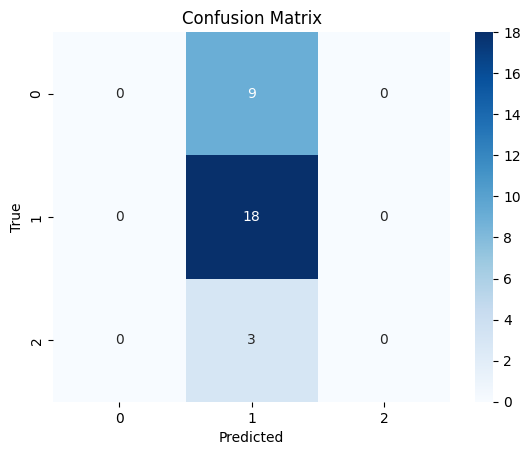

In [124]:
# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix as a heat map
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [125]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = tweets['renderedContent']
y = tweets['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_transformed = vectorizer.transform(X_test)


print(f"Support Vector Machine (SVM)")

from sklearn.svm import SVC

# Initialize the SVM classifier
classifier = SVC()

# Start training time
start_time = time.time()

# Train the classifier
classifier.fit(X_train_transformed, y_train)

# End training time
training_time = time.time() - start_time

# Start testing time
start_time = time.time()

# Predict the sentiment for the testing data
y_pred = classifier.predict(X_test_transformed)

# End testing time
testing_time = time.time() - start_time


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Print training time
print(f"Training Time: {training_time} seconds")

# Print testing time
print(f"Testing Time: {testing_time} seconds")

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Support Vector Machine (SVM)
Accuracy: 0.6
F1 Score: 0.44999999999999996
Training Time: 0.0027654170989990234 seconds
Testing Time: 0.00046896934509277344 seconds
Confusion Matrix:
[[ 0  9  0]
 [ 0 18  0]
 [ 0  3  0]]


In [126]:
print(tweets.columns)

Index(['tweet_date', 'renderedContent', 'sentiment'], dtype='object')


In [127]:
print(tweets.columns)

Index(['tweet_date', 'renderedContent', 'sentiment'], dtype='object')


In [128]:
print(tweets.columns)


Index(['tweet_date', 'renderedContent', 'sentiment'], dtype='object')


In [129]:
if 'renderedContent' in tweets.columns:
    # Run the predictions
    tweets["sentiment"] = tweets['renderedContent'].apply(predict_sentiment)

# Add the 'Date' attribute
if 'tweet_date' in tweets.columns:
    tweets['Date'] = pd.to_datetime(tweets['tweet_date']).dt.date

# Show the updated DataFrame
tweets.head()


,tweet_date,renderedContent,sentiment,Date
0,2021-05-20,This is tweet 1,positive,2021-05-20
1,2019-03-30,This is tweet 2,neutral,2019-03-30
2,2019-09-23,This is tweet 3,positive,2019-09-23
3,2020-03-18,This is tweet 4,positive,2020-03-18
4,2021-09-29,This is tweet 5,neutral,2021-09-29


In [130]:
grouped = tweets.groupby(by='Date')['sentiment'].value_counts()
grouped

Date        sentiment
2019-01-15  negative     1
            neutral      1
            positive     1
2019-01-30  negative     1
2019-02-14  negative     1
                        ..
2022-09-04  positive     1
2022-09-18  neutral      1
            positive     1
2022-11-02  positive     1
2022-12-01  positive     1
Name: sentiment, Length: 90, dtype: int64

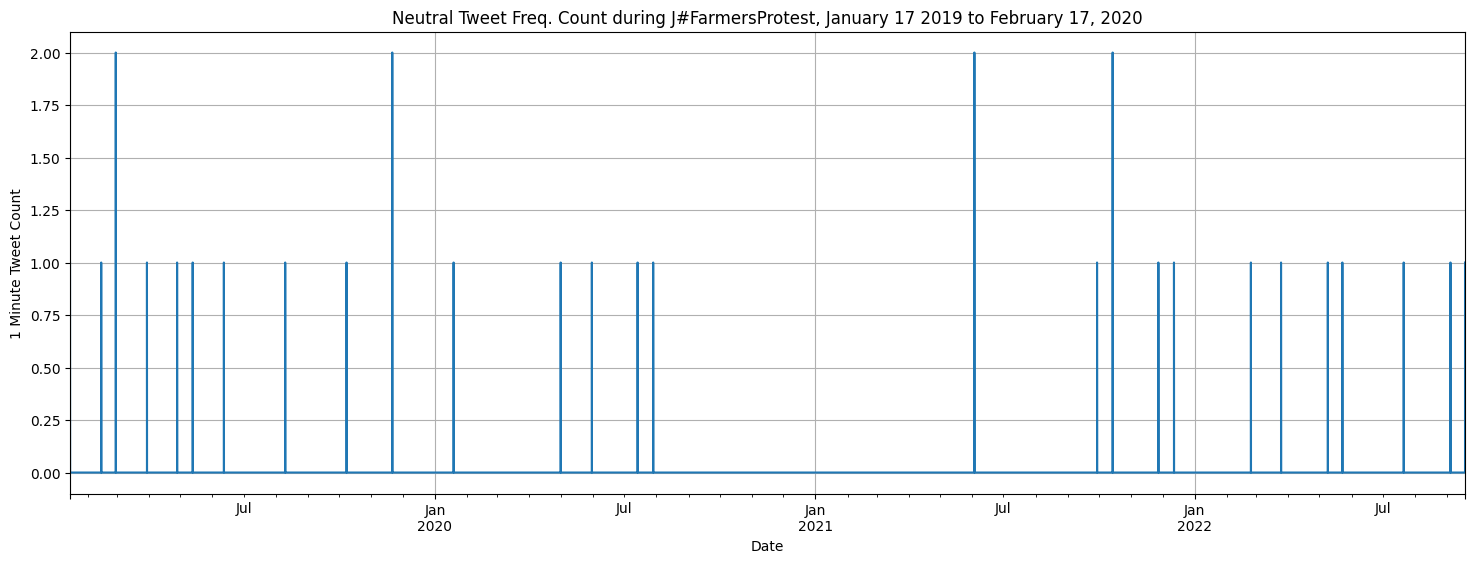

In [131]:
import matplotlib.pyplot as plt

# Check if 'Date' column exists in the DataFrame
if 'Date' in tweets.columns:
    # Convert 'Date' column to datetime format
    tweets['Date'] = pd.to_datetime(tweets['Date'])

    # Filter the DataFrame for 'neutral' sentiment and group by 1-minute intervals
    tweet_df_1min = tweets[tweets.sentiment == 'neutral'].groupby(pd.Grouper(key='Date', freq='1Min', convention='start')).size()

    # Plotting the tweet count
    tweet_df_1min.plot(figsize=(18, 6))
    plt.ylabel('1 Minute Tweet Count')
    plt.title('Neutral Tweet Freq. Count during J#FarmersProtest, January 17 2019 to February 17, 2020')
    plt.grid(True)
    plt.show()
else:
    print("The 'Date' column is not found in the DataFrame.")


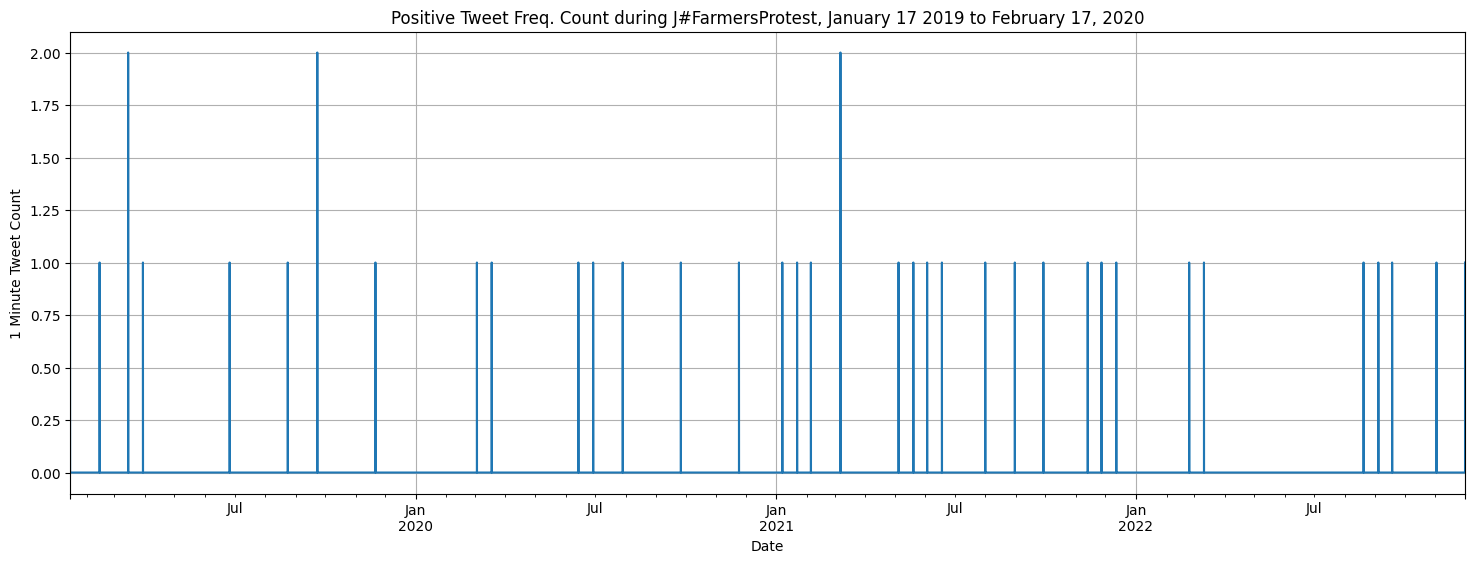

In [132]:
import matplotlib.pyplot as plt

# Check if 'Date' column exists in the DataFrame
if 'Date' in tweets.columns:
    # Convert 'Date' column to datetime format
    tweets['Date'] = pd.to_datetime(tweets['Date'])

    # Filter the DataFrame for 'positive' sentiment
    positive_tweets = tweets[tweets.sentiment == 'positive']

    if len(positive_tweets) > 0:
        # Group by 1-minute intervals
        tweet_df_1min = positive_tweets.groupby(pd.Grouper(key='Date', freq='1Min', convention='start')).size()

        if len(tweet_df_1min) > 0:
            # Plotting the tweet count
            tweet_df_1min.plot(figsize=(18, 6))
            plt.ylabel('1 Minute Tweet Count')
            plt.title('Positive Tweet Freq. Count during J#FarmersProtest, January 17 2019 to February 17, 2020')
            plt.grid(True)
            plt.show()
        else:
            print("No positive tweets found for the specified date range.")
    else:
        print("No tweets with 'positive' sentiment found in the DataFrame.")
else:
    print("The 'Date' column is not found in the DataFrame.")
